Epoch: 0, weights: [-1.28277636 -0.86711241  0.32351956 -0.01121392], number of errors 4
Epoch: 1, weights: [-0.88277636 -0.86711241  0.92351956 -0.01121392], number of errors 2
Epoch: 2, weights: [-0.88277636 -1.26711241 -0.07648044 -0.01121392], number of errors 2
Epoch: 3, weights: [-1.08277636 -1.66711241  1.92351956 -0.01121392], number of errors 4
Epoch: 4, weights: [-1.08277636 -2.06711241  0.92351956 -0.01121392], number of errors 2
Epoch: 5, weights: [-0.68277636 -2.06711241  1.52351956 -0.01121392], number of errors 2
Epoch: 6, weights: [-0.68277636 -2.46711241  0.52351956 -0.01121392], number of errors 2
Epoch: 7, weights: [-0.88277636 -2.86711241  2.52351956 -0.01121392], number of errors 4
Epoch: 8, weights: [-0.88277636 -3.26711241  1.52351956 -0.01121392], number of errors 2
Epoch: 9, weights: [-0.48277636 -3.26711241  2.12351956 -0.01121392], number of errors 2
Epoch: 10, weights: [-0.48277636 -3.66711241  1.12351956 -0.01121392], number of errors 2
Epoch: 11, weights: 

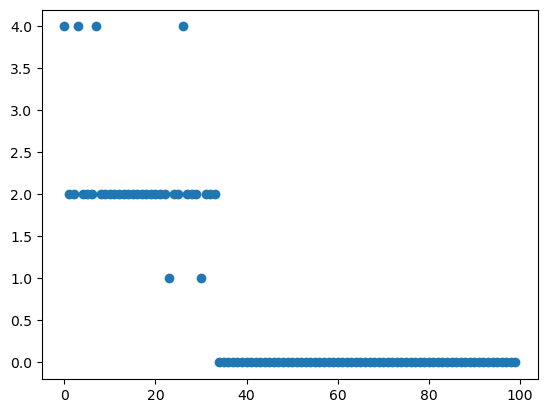

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
class Perceptron:
    
    def __init__(self, eta=0.10, epochs=50, is_verbose = False):
        
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []
        
        
    def predict(self, x):
        
        total_stimulation = np.dot(x, self.w)       
        y_pred = 1 if total_stimulation > 0 else -1
        return y_pred
        
    
    def fit(self, X, y):
        
        self.list_of_errors = []
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(), ones, axis=1)
 
        self.w = np.random.rand(X_1.shape[1])
        
        for e in range(self.epochs):
 
            number_of_errors = 0
            
            for x, y_target in zip(X_1,y):
            
                y_pred = self.predict(x)
                delta_w = self.eta * (y_target - y_pred) * x
                self.w += delta_w
                
                number_of_errors += 1 if y_target != y_pred else 0
                
            self.list_of_errors.append(number_of_errors)
            
            if(self.is_verbose):
                print("Epoch: {}, weights: {}, number of errors {}".format(
                        e, self.w, number_of_errors))
                
                
                
X = np.array([
    [2, 4,  20],  # 2*2 - 4*4 + 20 =   8 > 0
    [4, 3, -10],  # 2*4 - 4*3 - 10 = -14 < 0
    [5, 6,  13],  # 2*5 - 4*6 + 13 =  -1 < 0
    [5, 4,   8],  # 2*5 - 4*4 + 8 =    2 > 0
    [3, 4,   5],  # 2*3 - 4*4 + 5 =   -5 < 0 
])
 
y = np.array([1, -1, -1, 1, -1])
 
perceptron = Perceptron(eta=0.1, epochs=100, is_verbose=True)            
perceptron.fit(X, y)
 
print(perceptron.w)
 
print(perceptron.predict(np.array([[1, 2, 3, 1]])))  # 2*1 - 4*2 + 1 = -3 < 0
print(perceptron.predict(np.array([[2, 2, 8, 1]])))  # 2*2 - 4*2 + 8 =  4 > 0
print(perceptron.predict(np.array([[3, 3, 3, 1]])))  # 2*3 - 4*3 + 3 = -3 < 0
 
%matplotlib inline
 
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
 
 